# Policy SARSA Temporal Difference Learning

To explain the SARSA Temporal Difference algorithm, we need to introduce the following notation.

The current state is denoted by S.

The action taken at the current state is denoted by A.

The destination state that is reached by taking the action A at the state S is denoted by S'.

The action taken in the destination state S' is denoted by A'.

The reward obtained by reaching the state S' is denoted by R.
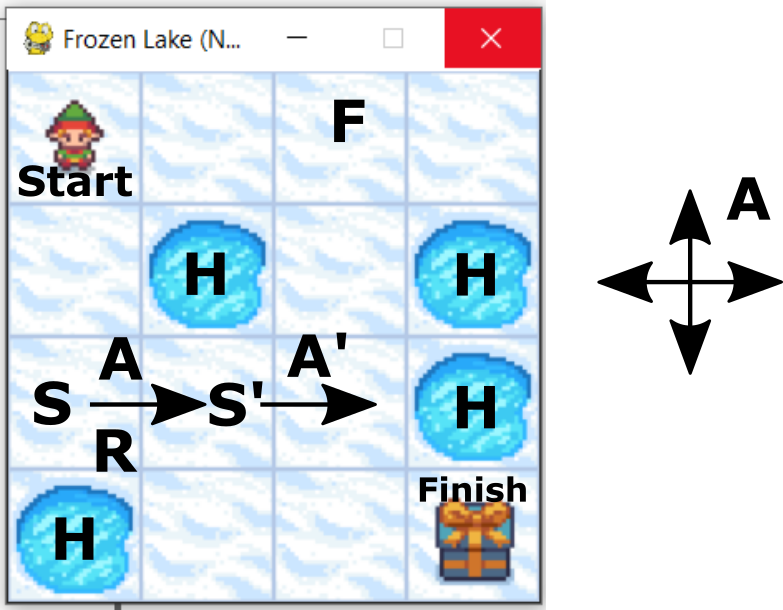

Here is the main idea of the SARSA temporal difference learning approach. Before the learning episodes start, we initialize Q(S,A) to zero for all S and A. We start an episode from the start field S, and we select an action A by using a policy (rule for selecting the actions in particular states) that will be explained later in the text. This action leads us to the next state S' and we obtain the reward R. At this next state, we select an A' by using the policy (under the condition that the destination state S' is not the terminal state). This is shown in the figure 2 above. Then, if the destination state S' is not a terminal state, having information about S,A,S',A', we update the action value function as follows



where alpha>0 is the step size and gamma is the discount rate. If the state S' is the terminal state, then the update equation

We keep on updating the action value functions by using these two equations until the end of an episode. That is, until we reach the terminal state that can either be the hole states or the goal state.

Now, it should be clear why the name of the algorithm is SARSA. This is because to compute the action value function update, we need the current State, the current Action, the current Rewards, next State, and next Action (SARSA).

## Perform the following steps iteratively for every simulation episode

1- Initialize the state S

2- Choose the action A by using the epsilon greedy policy computed on the current value of Q(S,A).

3- Simulate an episode starting from S and in every time step of the episode perform recursively the steps given until the terminal state is reached
– 3.1) Apply the action A and observe the response of the environment. That is, observe the next state S' and the reward R obtained by reaching that state.
– 3.2) Select the action A' on the basis of S' (if S’ is not the terminal state) by using the epsilon-greedy policy computed on the basis of the current value of Q(S’,A’). If the state S' is not the terminal state, update Q as follows



if the state S' is the terminal state, update Q as follows



– 3.3) Set S<- S' and A<- A' and go to step 3.1) (if the terminal state is not reached)


Next, we have to explain the policy for selecting the action. Consider the figure below

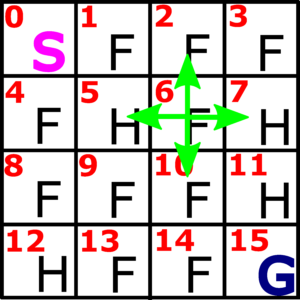

Let us suppose that we are in the state 6, and let us assume that the current action value function estimate in the state 6 is



where the column numbers of this row vector (starting from zero in order to be consistent with the Python notation) correspond to the actions: 0 column is left, column 1 is action “down”, column 2 is action “right”, and column 3 is action “up”. The greedy action selection will select the action with the column number 1, corresponding to the maximal value of the action value function. That is, the maximum is Q(6,1)=0.6 and it is achieved for the action 1.

Consequently, we choose the action 1 in state 6. This is the main idea of the greedy approach. In every state, select an action that produces the maximum value of the action value function. However, this greedy approach has one drawback. For example, let us suppose that we run the algorithm from the first episode. In this first episode, we randomly select actions since there is no previously computed data on which basis we can estimate Q(S,A). We assume that the initial value of Q(S,A) is zero for all the states and actions. Then, after the first episode is completed, we can obtain an estimate of Q(S,A) for the visited states. Now, if we follow the greedy approach, in the second episode we will select the actions that are taken in the first episode. This is because in the first episode, only pairs (S,A) that are visited are non-zero and all other pairs are zero. Due to this, the same set of actions will be selected in all subsequent episodes. Consequently, we might not be able to compute the optimal policy. We use an epsilon-greedy approach to deal with this problem. In the epsilon greedy policy, we do the following. First, we select a small number \varepsilon <1 (let us say smaller than 0.3)

*Draw a random number from 0 to 1.

*If this number is smaller than a user-defined number \varepsilon, then we randomly select an action in a certain state S.

*On the other hand, if this number is larger than \varepsilon, we select an action that maximizes the action value function in the particular state.

This is the epsilon-greedy learning approach. It enables us to deviate from the greedy approach by performing exploration. Exploration is a fancy word used to denote random actions. Now in practice, we use an epsilon greedy approach for the first let us say n episodes, and after n after which we learn the environment model sufficiently accurately, we need to start decreasing \varepsilon gradually. This can for example be achieved as follows



In this way, we ensure that after we learn the model sufficiently accurately, we start to explore less and less in order to ensure that we converge to the static policy.

Here, we have to make one final modification. In practice, during the first t episodes, where t is a relatively small number, we randomly select the actions. So, in practice, the procedure for selecting the control actions looks like this

*During the first t episodes, we randomly select the actions in every state

*From the episode t+1 until the episode n, we select the actions by using the epsilon-greedy approach.

*After the episode n, we slowly decrease the epsilon parameter by using the equation 

### Python Implementation

In [1]:
import numpy as np
 
 
class SARSA_Learning:
     
    ###########################################################################
    #   START - __init__ function
    ###########################################################################
    # INPUTS: 
    # env - Frozen Lake environment
    # alpha - step size 
    # gamma - discount rate
    # epsilon - parameter for epsilon-greedy approach
    # numberEpisodes - total number of simulation episodes
     
    def __init__(self,env,alpha,gamma,epsilon,numberEpisodes):
      
        self.env=env
        self.alpha=alpha
        self.gamma=gamma 
        self.epsilon=epsilon 
        self.stateNumber=env.observation_space.n
        self.actionNumber=env.action_space.n 
        self.numberEpisodes=numberEpisodes
        # this vector is the learned policy
        self.learnedPolicy=np.zeros(env.observation_space.n)
        # this matrix is the action value function matrix 
        # its entries are (s,a), where s is the state number and action is the action number
        # s=0,1,2,\ldots,15, a=0,1,2,3
        self.Qmatrix=np.zeros((self.stateNumber,self.actionNumber))
         
     
    ###########################################################################
    #   END - __init__ function
    ###########################################################################
     
    ###########################################################################
    #    START - function for selecting an action: epsilon-greedy approach
    ###########################################################################
    # this function selects an action on the basis of the current state 
    # INPUTS: 
    # state - state for which to compute the action
    # index - index of the current episode
    def selectAction(self,state,index):
         
        # first 100 episodes we select completely random actions to avoid being stuck
        if index<100:
            return np.random.choice(self.actionNumber)   
             
        # Returns a random real number in the half-open interval [0.0, 1.0)
        randomNumber=np.random.random()
           
        if index>1000:
            self.epsilon=0.9*self.epsilon
         
        # if this condition is satisfied, we are exploring, that is, we select random actions
        if randomNumber < self.epsilon:
            # returns a random action selected from: 0,1,...,actionNumber-1
            return np.random.choice(self.actionNumber)            
         
        # otherwise, we are selecting greedy actions
        else:
            # we return the index where actionValueMatrixEstimate[state,:] has the max value
            return np.random.choice(np.where(self.Qmatrix[state,:]==np.max(self.Qmatrix[state,:]))[0])
            # here we need to return the minimum index since it can happen
            # that there are several identical maximal entries, for example 
            # import numpy as np
            # a=[0,1,1,0]
            # np.where(a==np.max(a))
            # this will return [1,2], but we only need a single index
            # that is why we need to have np.random.choice(np.where(a==np.max(a))[0])
            # note that zero has to be added here since np.where() returns a tuple
    ###########################################################################
    #    END - function selecting an action: epsilon-greedy approach
    ###########################################################################
     
     
    ###########################################################################
    #    START - function for simulating an episode
    ###########################################################################
      
    def simulateEpisodes(self):
         
        # here we loop through the episodes
        for indexEpisode in range(self.numberEpisodes):
             
            # reset the environment at the beginning of every episode
            (stateS,prob)=self.env.reset()
             
            # select an action on the basis of the initial state
            actionA = self.selectAction(stateS,indexEpisode)
             
            print("Simulating episode {}".format(indexEpisode))
             
             
            # here we step from one state to another
            # this will loop until a terminal state is reached
            terminalState=False
            while not terminalState:
                          
                # here we step and return the state, reward, and boolean denoting if the state is a terminal state
                # prime means that it is the next state
                (stateSprime, rewardPrime, terminalState,_,_) = self.env.step(actionA)          
                 
                # next action
                actionAprime = self.selectAction(stateSprime,indexEpisode)
                 
                if not terminalState:
                    error=rewardPrime+self.gamma*self.Qmatrix[stateSprime,actionAprime]-self.Qmatrix[stateS,actionA]
                    self.Qmatrix[stateS,actionA]=self.Qmatrix[stateS,actionA]+self.alpha*error
                else:
                    # in the terminal state, we have Qmatrix[stateSprime,actionAprime]=0 
                    error=rewardPrime-self.Qmatrix[stateS,actionA]
                    self.Qmatrix[stateS,actionA]=self.Qmatrix[stateS,actionA]+self.alpha*error
                                     
                stateS=stateSprime
                actionA=actionAprime
     
    ###########################################################################
    #    END - function for simulating an episode
    ###########################################################################
                  
     
    ###########################################################################
    #    START - function for computing the final policy
    ###########################################################################            
    def computeFinalPolicy(self):
         
        # now we compute the final learned policy
        for indexS in range(self.stateNumber):
            # we use np.random.choice() because in theory, we might have several identical maximums
            self.learnedPolicy[indexS]=np.random.choice(np.where(self.Qmatrix[indexS]==np.max(self.Qmatrix[indexS]))[0])
     
    ###########################################################################
    #    END - function for computing the final policy
    ###########################################################################            
                             

The function __init__() in the code lines 16 to 30 takes as input arguments: environment (env), step size (alpha), discount rate (gamma), epsilon parameter, and total number of episodes that we will simulate (numberEpisodes). It initializes the vector “self.learnedPolicy”. This vector is the learned policy that is computed by the function “computeFinalPolicy” on the code lines 127-132. It has 16 entries and its i-th entry is the action that has to be take in the state i. Then it also initializes the matrix “self.Qmatrix”. Entry (s,a) of this matrix is the value of the action value function in the pair (s,a). That is, this matrix stores all the Q(S,A) values. The function “simulateEpisodes(self)” defined in the code lines 82-117 simulates an episode and updated the action value functions according to the equations (1) and (2). In this function, we call the function “selectAction(self,state,index)”, defined in the code lines 44 to 72, that implements the epsilon-greedy policy according to the previously explained procedure. Finally, the function “computeFinalPolicy(self)” defined in the code lines 127-132 computes the final learned policy “learnedPolicy”.

In [2]:
# Note: 
# You can either use gym (not maintained anymore) or gymnasium (maintained version of gym)    
     
# tested on     
# gym==0.26.2
# gym-notices==0.0.8
 
#gymnasium==0.27.0
#gymnasium-notices==0.0.1
 
# classical gym 
import gymnasium as gym
# instead of gym, import gymnasium 
# import gymnasium as gym
import numpy as np
import time
  
# create the environment 
# is_slippery=False, this is a completely deterministic environment, 
# uncomment this if you want to render the environment during the solution process
# however, this will slow down the solution process
#env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode="human")
 
# here we do not render the environment for speed purposes
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
env.reset()
# render the environment
# uncomment this if you want to render the environment
#env.render()
# this is used to close the rendered environment
#env.close()
  
# investigate the environment
# observation space - states 
env.observation_space
  
env.action_space
# actions:
#0: LEFT
#1: DOWN
#2: RIGHT
#3: UP
 
 
# define the parameters
 
# step size
alpha=0.1
# discount rate
gamma=0.9
# epsilon-greedy parameter
epsilon=0.2
# number of simulation episodes
numberEpisodes=10000
 
# initialize
SARSA1= SARSA_Learning(env,alpha,gamma,epsilon,numberEpisodes)
# simulate
SARSA1.simulateEpisodes()
# compute the final policy
SARSA1.computeFinalPolicy()
 
# extract the final policy
finalLearnedPolicy=SARSA1.learnedPolicy
 
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')
(currentState,prob)=env.reset()
env.render()
time.sleep(2)
terminalState=False
for i in range(100):
    if not terminalState:
        (currentState, currentReward, terminalState,_,_) = env.step(int(finalLearnedPolicy[currentState]))
        time.sleep(1)
    else:
        break
time.sleep(0.5)
env.close()

finalLearnedPolicy


Simulating episode 0
Simulating episode 1
Simulating episode 2
Simulating episode 3
Simulating episode 4
Simulating episode 5
Simulating episode 6
Simulating episode 7
Simulating episode 8
Simulating episode 9
Simulating episode 10
Simulating episode 11
Simulating episode 12
Simulating episode 13
Simulating episode 14
Simulating episode 15
Simulating episode 16
Simulating episode 17
Simulating episode 18
Simulating episode 19
Simulating episode 20
Simulating episode 21
Simulating episode 22
Simulating episode 23
Simulating episode 24
Simulating episode 25
Simulating episode 26
Simulating episode 27
Simulating episode 28
Simulating episode 29
Simulating episode 30
Simulating episode 31
Simulating episode 32
Simulating episode 33
Simulating episode 34
Simulating episode 35
Simulating episode 36
Simulating episode 37
Simulating episode 38
Simulating episode 39
Simulating episode 40
Simulating episode 41
Simulating episode 42
Simulating episode 43
Simulating episode 44
Simulating episode 4

array([1., 0., 0., 1., 1., 0., 1., 2., 2., 1., 1., 0., 0., 2., 2., 1.])

In [ ]:
# simulate the learned policy for verification
while True:
    # to interpret the final learned policy you need this information
    # actions: 0: LEFT, 1: DOWN, 2: RIGHT, 3: UP
    # let us simulate the learned policy
    # this will reset the environment and return the agent to the initial state
    env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')
    (currentState,prob)=env.reset()
    env.render()
    time.sleep(1)
    # since the initial state is not a terminal state, set this flag to false
    terminalState=False
    for i in range(100):
        # here we step and return the state, reward, and boolean denoting if the state is a terminal state
        if not terminalState:
            (currentState, currentReward, terminalState,_,_) = env.step(int(finalLearnedPolicy[currentState]))
            time.sleep(1)
        else:
            break
    time.sleep(0.5)
    env.close()   
finalLearnedPolicy